CANNY EDGE DETECTION

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math



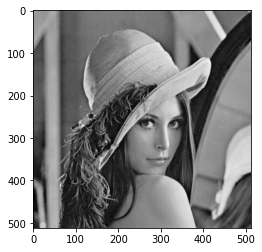

In [25]:
img= cv2.imread('images/Lenna.png',0)
height,width=img.shape
plt.imshow(img,'gray')

In [26]:
arr=np.asarray(cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0))

NOISE REDUCTION

In [27]:
kernel=np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
blur=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

Text(0.5, 1.0, 'Blur Image')

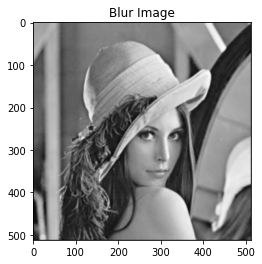

In [28]:
for i in range(height):
    for j in range(width):
        blur[i,j]=int(np.sum(arr[i:i+5 , j:j+5]*kernel)/np.sum(kernel))
plt.imshow(blur,'gray')
plt.title("Blur Image")

In [29]:
sb_i=cv2.copyMakeBorder(blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))
for i in range(height):
    for j in range(width):
        sobel[i,j]=sobel[i,j] / sobel.max() *255

theta = np.arctan2(sy, sx)

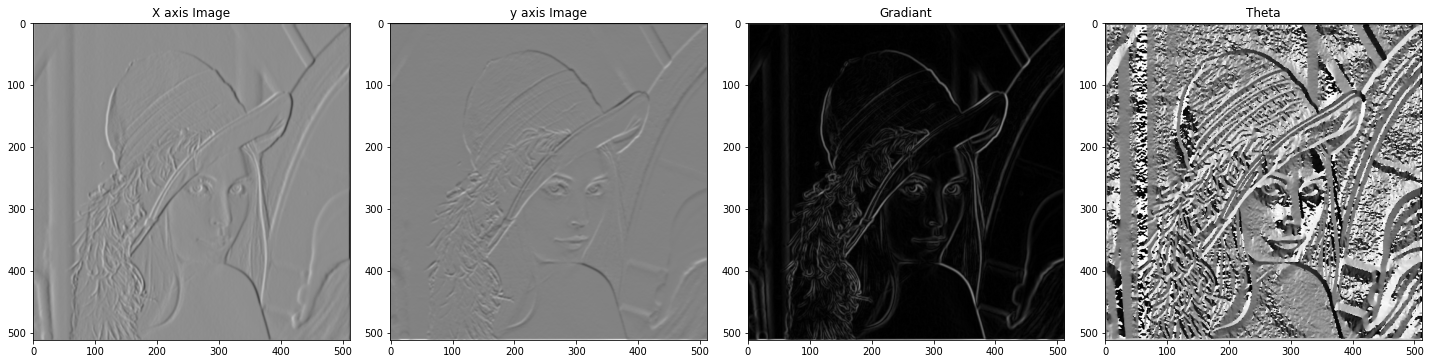

In [30]:
plt.figure(figsize=(20,20))

plt.subplot(1,4,1)
plt.imshow(sx,'gray')
plt.title("X axis Image")

plt.subplot(1,4,2)
plt.imshow(sy,'gray')
plt.title("y axis Image")

plt.subplot(1,4,3)
plt.imshow(sobel,'gray')
plt.title("Gradiant")

plt.subplot(1,4,4)
plt.imshow(theta,'gray')
plt.title("Theta")

plt.tight_layout()

In [31]:
print(theta)
print(sobel)

[[-0.78539816 -1.35704376 -1.53551685 ... -1.66963289 -1.86514016
  -2.38111145]
 [-0.21375256 -0.78539816 -1.40073771 ... -2.00797354 -2.51734639
  -2.93509264]
 [-0.03863623 -0.17583028 -0.78539816 ... -2.86075493 -3.0495458
  -3.11641812]
 ...
 [ 0.07047134  0.21406068  0.46364761 ...  2.8198421   3.10934577
   3.13888263]
 [ 0.2200617   0.66730613  1.13612611 ...  1.7078625   2.39356027
   2.9532364 ]
 [ 0.77508925  1.28474489  1.46386117 ...  1.59752793  1.77607461
   2.36067877]]
[[154.87730061 172.71165644 186.16564417 ... 191.09022556 169.68045113
  145.07518797]
 [176.39097744  80.84586466  64.22932331 ...  70.30075188  92.9887218
  165.20676692]
 [190.13157895  63.90977444  17.57518797 ...  34.5112782   83.40225564
  177.66917293]
 ...
 [ 54.87341772  22.91772152   8.71518987 ...   6.13291139  40.02531646
  119.10759494]
 [ 50.35443038  27.11392405  20.01265823 ...  37.76582278  48.74050633
  112.00632911]
 [ 44.22151899  51.32278481  57.4556962  ... 255.         255.
  255. 

In [32]:
angle = theta * 180. / np.pi
angle[angle < 0] += 180
print(angle)

[[135.         102.24711981  92.02136494 ...  84.33708182  73.13534077
   43.57236333]
 [167.75288019 135.          99.74364129 ...  64.95159069  35.76667649
   11.83157918]
 [177.78630732 169.92566727 135.         ...  16.09081635   5.27389596
    1.4423947 ]
 ...
 [  4.03771062  12.26477373  26.56505118 ... 161.56505118 178.15238973
  179.84472726]
 [ 12.60860679  38.23382518  65.09523119 ...  97.8533133  137.14090137
  169.20798137]
 [ 44.40934279  73.61045967  83.87306699 ...  91.53160779 101.76157904
  135.25693002]]


In [33]:
n_m_s=np.zeros(img.shape, dtype=np.int32)
for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        try:
            q = 255
            r = 255

            #angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = sobel[i, j+1]
                r = sobel[i, j-1]
            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = sobel[i+1, j-1]
                r = sobel[i-1, j+1]
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = sobel[i+1, j]
                r = sobel[i-1, j]
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = sobel[i-1, j-1]
                r = sobel[i+1, j+1]
            if (sobel[i,j] >= q) and (sobel[i,j] >= r):
                n_m_s[i,j] = sobel[i,j]
            else:
                n_m_s[i,j] = 0
        except IndexError as e:
            pass

Text(0.5, 1.0, 'Non Max Supression')

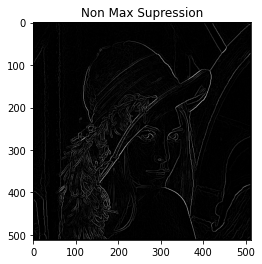

In [34]:
plt.imshow(n_m_s,'gray')
plt.title("Non Max Supression")

In [35]:
weak = np.int32(25)
strong = np.int32(255)
highThreshold = n_m_s.max() * 0.09
lowThreshold = highThreshold * 0.05

dub_thres=np.zeros(img.shape,dtype=np.int32)

strong_i, strong_j = np.where(n_m_s >= highThreshold)
zeros_i, zeros_j = np.where(n_m_s < lowThreshold)

weak_i, weak_j = np.where((n_m_s <= highThreshold) & (n_m_s >= lowThreshold))

dub_thres[strong_i, strong_j] = strong
dub_thres[weak_i, weak_j] = weak

Text(0.5, 1.0, 'Double Threshold')

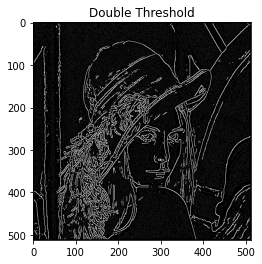

In [36]:
plt.imshow(dub_thres,'gray')
plt.title("Double Threshold")

In [37]:
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        if (dub_thres[i,j] == weak):
            try:

                if ((dub_thres[i+1, j-1] == strong) or (dub_thres[i+1, j] == strong) or 
                (dub_thres[i+1, j+1]== strong) or (dub_thres[i, j-1] == strong) or 
                (dub_thres[i, j+1] == strong) or (dub_thres[i-1, j-1] == strong)or 
                (dub_thres[i-1, j] == strong) or (dub_thres[i-1, j+1] == strong)):
                    dub_thres[i, j] = strong
                else:
                    dub_thres[i, j] = 0
            except IndexError as e:
                pass

Text(0.5, 1.0, 'Final Image of Canny Edge Detection')

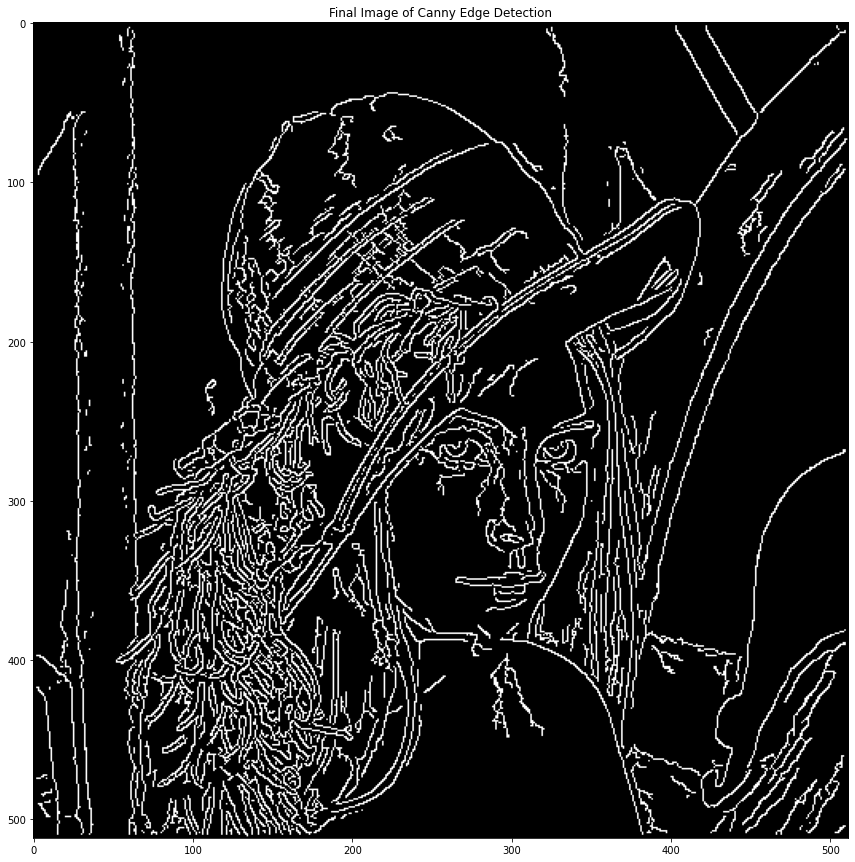

In [38]:
plt.figure(figsize=(15,15))
plt.imshow(dub_thres,'gray')
plt.title("Final Image of Canny Edge Detection")

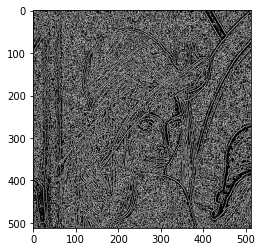

In [39]:
edge=cv2.Canny(img,lowThreshold,highThreshold)
plt.imshow(edge,'gray')